In [2]:
pip install pandas

     --------------------------------------- 11.3/11.3 MB 11.5 MB/s eta 0:00:00
     --------------------------------------- 13.1/13.1 MB 11.7 MB/s eta 0:00:00
     ------------------------------------- 509.2/509.2 kB 10.8 MB/s eta 0:00:00
     ------------------------------------- 347.8/347.8 kB 21.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install numpy matplotlib seaborn scikit-learn

     ---------------------------------------- 8.1/8.1 MB 11.3 MB/s eta 0:00:00
     ------------------------------------- 294.9/294.9 kB 17.8 MB/s eta 0:00:00
     ---------------------------------------- 8.9/8.9 MB 13.5 MB/s eta 0:00:00
     ------------------------------------- 225.2/225.2 kB 13.4 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 24.1 MB/s eta 0:00:00
     ---------------------------------------- 73.8/73.8 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 13.5 MB/s eta 0:00:00
     -------------------------------------- 113.9/113.9 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 38.7/38.7 MB 9.9 MB/s eta 0:00:00
     ------------------------------------- 308.4/308.4 kB 18.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
# Load dataset
df = pd.read_csv("HR-Employee-Attrition.csv")

# Quick overview
print(df.shape)
print(df.columns)
df.head()


(1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Handle missing values
df = df.dropna()  # or fill with median/mean if needed

# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert categorical data
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Check for remaining nulls
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

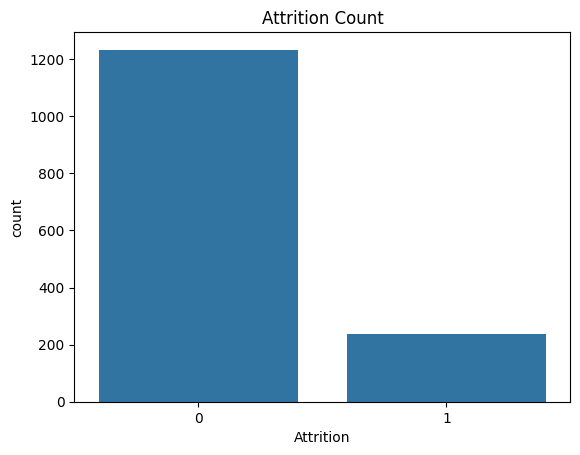

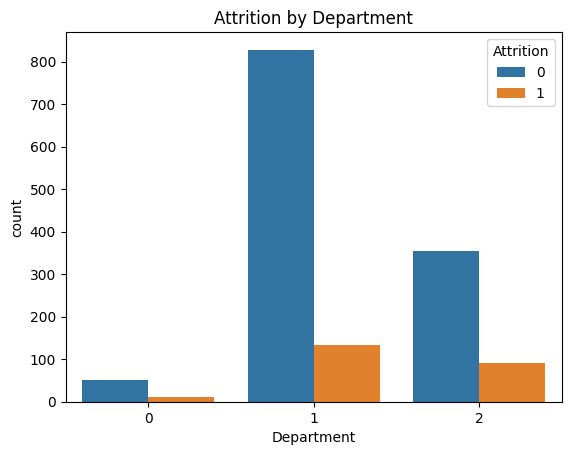

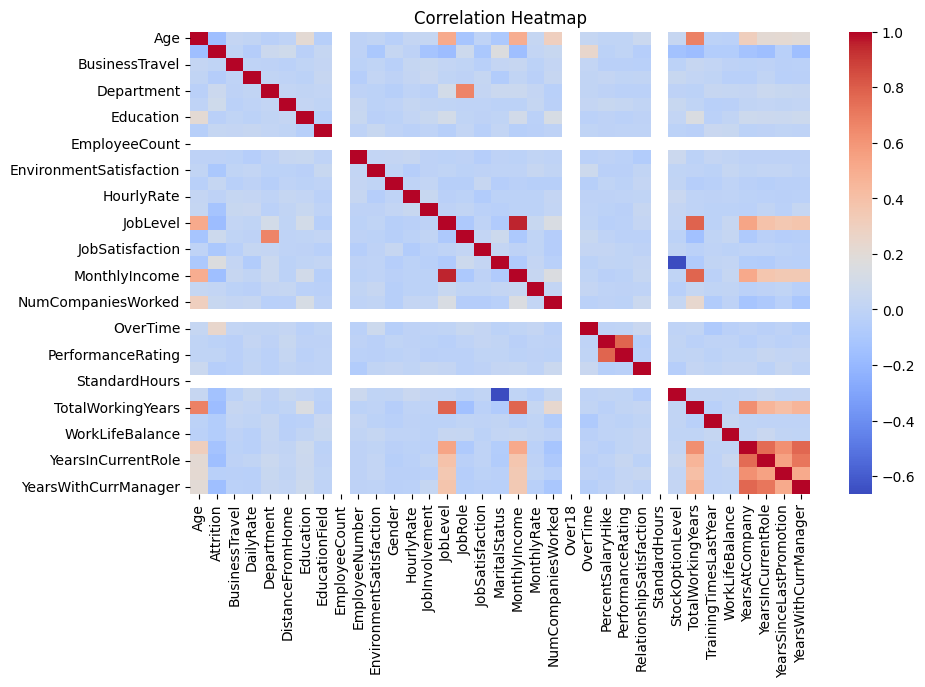

In [7]:
# Attrition distribution
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count")
plt.show()

# Attrition by Department
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [8]:
# Define features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)


Accuracy: 0.8673469387755102

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



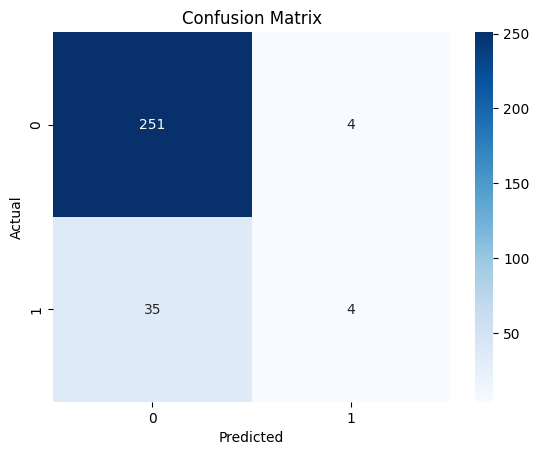

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


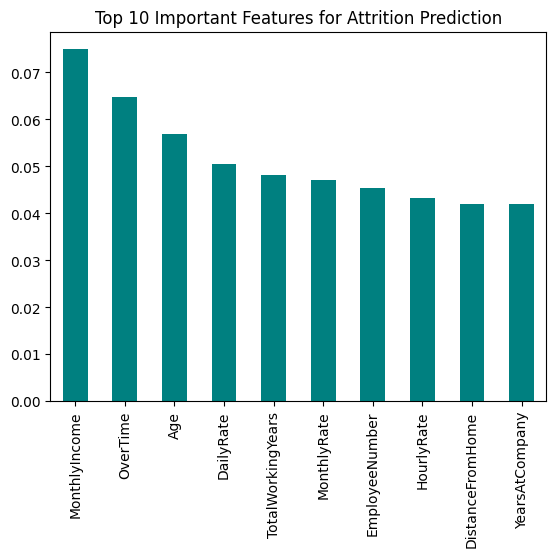

In [11]:
importances = pd.Series(rf.feature_importances_, index=df.drop('Attrition', axis=1).columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Important Features for Attrition Prediction")
plt.show()


In [12]:
# Add predictions to original data
df['Attrition_Predicted'] = rf.predict(X_scaled)
df.to_csv("employee_attrition_results.csv", index=False)
print("✅ Results exported for Power BI dashboard.")


✅ Results exported for Power BI dashboard.
